# 2.6 Variance and Uncertainty

## Calculating the Mean:

calculating the mean can be done with both base python and numpy. The main advantage of using numpy is that you know exactly what is being done with the `np.mean()` method

In [23]:
import numpy as np
data = [3, 4,4,5,7,2,10]

In [24]:
# calculate the mean with base python
sum(data) / len(data)

5.0

In [25]:
# calculate the mean with numpy:
np.mean(data)

5.0

# Variance and Uncertainty

Any interesting dataset has a mix of different values. With just one value, there is no uncertainty about a new data point. But perhaps you should wonder why we think the value is interesting, but it never changes. Once we have multiple values, uncertainty is introduced about new data points. What will their values be? Will they match the ones we’ve seen? What can we say about them? Are they spread out or close together? Are they concentrated around the mean? Variance gives us our first measure of that uncertainty.

## Definitions

**Definition: Variance:**

If $X$ is a vector of $n$ values, then the variance of $X$ is defined as:

### $Var(x) = \frac{\sum_{i}(x_{i} - mean (X))^{2}}{n}$

The variance can also be calculated as:

### $Var(x) = mean(x^{2}) - mean(x^{2})$

which is convenience for some algebra. 

**Definition: sample variance**

If $X$ is a vector of $n$ values, then the sample variance of $X$ is defined as

### $\frac{\sum_{i}(x - mean(X))^{2}}{n - 1}$

**Definition: standard deviation**

If $X$ is a vector of $n$ values, then the standard deviation of $X$ is defined as

### $\sigma(x) = \sqrt{Var(x)}$
### $ = \sqrt{\frac{\sum_{i}(x - mean(X))^{2}}{n - 1}}$

**Definition: Sample standard Deviation:**

If $X$ is the vector of $n$ values, then the sample standard deviation of $x$ is defined as

### $\sqrt{\frac{\sum_{i}(x_{i} - mean(X))^{2}}{n - 1}}$
  




In [13]:
# calculate the variance of a dataset
mean = sum(data) / len(data)
variance = sum((d - mean) ** 2 for d in data) / len(data)
variance

6.285714285714286

In [14]:
# calculate the sample variance of a dataset
sample_variance = sum((d - mean) ** 2 for d in data)/ (len(data) -1)
sample_variance

7.333333333333333

In [16]:
#var with numpy
np.var(data)

6.285714285714286

In [18]:
#sample variance with numpy
np.var(data, ddof=1)

7.333333333333333

In [20]:
#standard deviation with math module
import math
math.sqrt(np.var(data))

2.5071326821120348

In [21]:
# standard deviation with numpy
np.std(data)

2.5071326821120348

In [22]:
#sample standard deviation
np.std(data, ddof=1)

2.70801280154532

## Compare and Contrast
- Technical definition vs. colloquial usage. The word “variance” is colloquially used as a broad placeholder for all uncertainty and variation instead of just the specific calculation referenced here.
- Sample variance vs. regular variance. The normal calculation of variance for a sample matches the true variance of the population as the sample size increases, but it is biased low. Mathematically, this happens because the same sample is being used to calculate the mean for the variance calculation. In addition, the mean happens to be the value minimizing the sum of differences squared. Reducing the denominator by one corrects for this effect and gives an unbiased estimate of the population variance. If the mean is provided separately and is not calculated from the same data, the correction is not needed.
- The mean and variance of a financial portfolio are the main considerations in most quantitative investment decisions. In this case, the mean is measuring expected return (gain) from an investment, and the variance is the variance of that return. All else being equal, we prefer a higher mean return and lower variance in that return. Fun fact: that insight is what led to Harry Markowitz receiving the Nobel Prize in Economics in 1990.

# 2.7  Lesson: Quantiles

### Quantiles
Quantiles are statistics about a dataset that are identified by what fradtion of values are above or below a particular fraction of the dataset

### Technical Definition
- For fraction p between zero and one, the p-quantile of values X is the value x such that at most a fraction p of X is below x, and at most a fraction (1-p) of X is above x.
- The median of a dataset is its 0.5-quantile. This is the most common quantile.
- The minimum value of a dataset is its 0.0-quantile.
- The maximum value of a dataset is its 1.0-quantile.
- Deciles are p-quantiles where p is a multiple of 0.1. The kth decile is the (k/10)-quantile.
- Percentiles are p-quantiles where p is a multiple of 0.01. The kth percentile is the (k/100)-quantile.

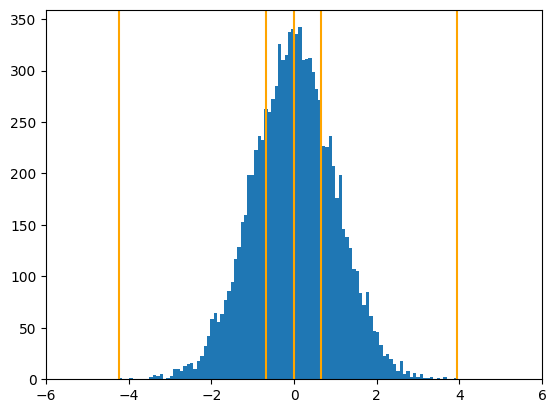
<center>
Figure 1 | Histogram showing the min/max, 25th and 75th Quantiles, and the median
</center>


In [27]:
#calculating quantiles
import math
data = [3, 4, 4, 5, 7, 2, 10]

#sort the data
sorted_data = sorted(data)

In [28]:
#calculate the target index of the data
p = 0.5
p * (len(data) - 1)

3.0

In [29]:
#fails because the index is float
sorted_data[p * (len(data) - 1)]

TypeError: list indices must be integers or slices, not float

In [30]:
sorted_data[int(math.ceil(p * (len(data)-1)))]

4

In [32]:
#linear interpolation
np.quantile(data, 0.3)

3.8

In [33]:
np.quantile(data, 0.5)

4.0

In [34]:
np.quantile(data, 0.75)

6.0

In [35]:
np.median(data)

4.0

# 2.9 Lesson: Modes

### Modes
The mode is the most common value in the dataset. That is because it occurs more often than any other value. There may be multiple modes if some values are tied for the most occurrences. The following image visually compares the mode, median, and mean.

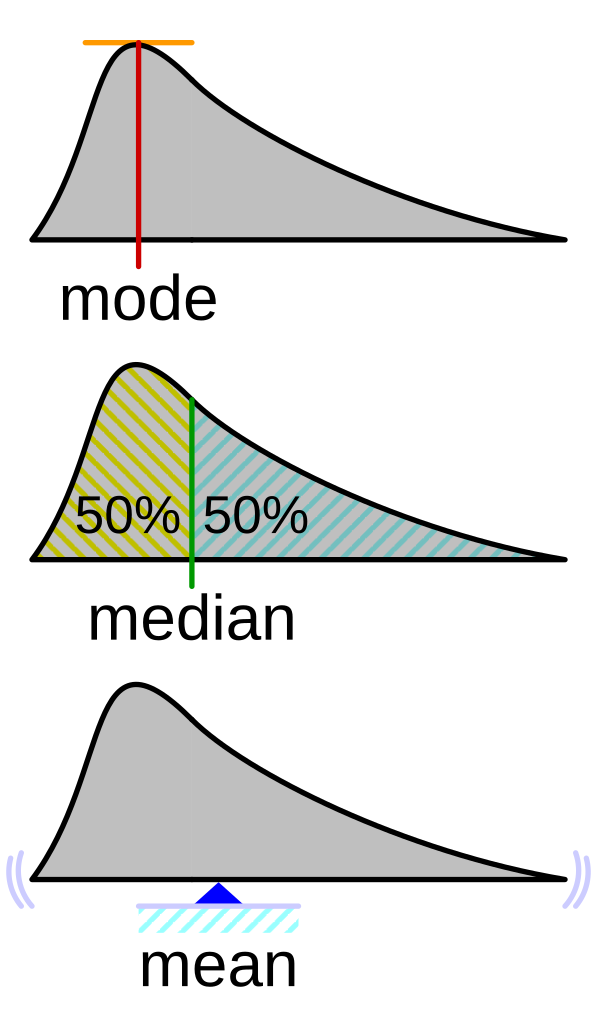

# 2.10 Lesson Skew

### Skew 

Skew is a measure of the asymmetry of a dataset or distribution around its mean. For example, if you took a symmetric normal (bell curve) dataset and added some more data above the (old) mean, that would induce a positive or right skew. Similarly, adding more data below the mean would induce a negative or left skew. 

**Technical Definition:**

### $skew(X) = mean((\frac{X - mean(X)}{stddev(X)})^{3})$

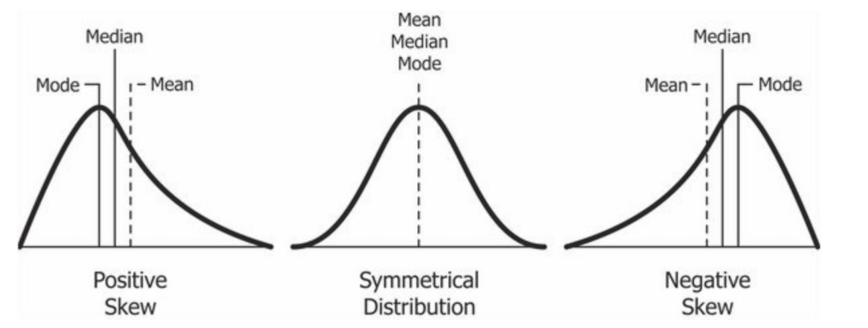

# 2.12 Lesson: Resampling a Dataset

**How to Resample a Dataset**
Once you have a dataset in hand, resampling that dataset to make new ones is easy. Python and most machine learning libraries even have this built in. This is in stark contrast to the potential costs of collecting new data.

In [36]:
#resampling with the random module
import random
print(random.choices.__doc__)

Return a k sized list of population elements chosen with replacement.

        If the relative weights or cumulative weights are not specified,
        the selections are made with equal probability.

        


In [38]:
#make a list with integers 0 to 9
data = list(range(10))
data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
# just calling a list with just the variable will return a list with just one sample
random.choices(data)

[2]

In [41]:
#pass the "k" parameter to get more values in a sample (will sample with replacement)
random.choices(data, k=5)

[0, 5, 8, 1, 1]

# 2.12 Lesson: Bootstrap Sampling

**Bootstrap Sampling**
The first use case for resampling is bootstrapping. Bootstrapping is a statistical technique that uses resampling to approximate the distribution of sample estimates when sampling the whole population.

The basic idea is simple. Given a dataset of n samples,

1. Sample n samples from the dataset with replacement. These are called a bootstrapped sample.
2. Compute the statistic of interest on the new bootstrapped sample.
3. Save that computed statistic as a bootstrapped sample estimate.
4. Repeat steps 1-3 until enough bootstrapped sample estimates have been generated. Nowadays, 1,000 to 10,000 bootstrap samples are common.
5. Perform a statistical analysis on these bootstrapped sample estimates.

In [42]:
# demonstrate bootstrap sampling
data = [0, 0, 0, 1, 1, 1, 2, 2, 2, 100] #outlier will significantly effect sample mean

In [43]:
import matplotlib.pyplot as plt

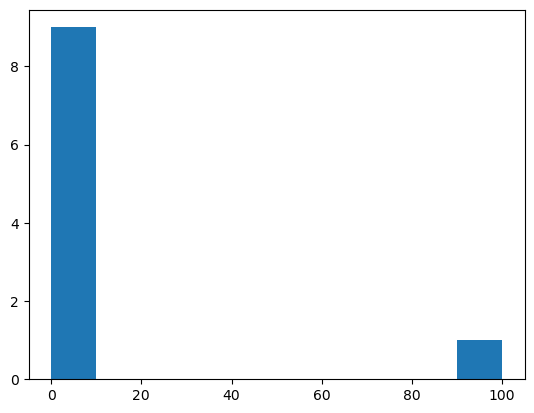

In [44]:
_ = plt.hist(data)

In [45]:
import numpy as np
np.mean(data)

10.9

In [47]:
np.std(data) #much bigger than the mean, something funky is going on. 

29.71009929300136

In [50]:
#bootstrap sampling 
import random
resampled_means = []
for i in range(1000):
    resampled_means.append(np.mean(random.choices(data, k=len(data))))
resampled_means[:10]

[10.3, 20.6, 20.9, 10.6, 1.2, 21.0, 1.0, 21.3, 0.5, 1.1]

In [51]:
#compute mean of the bootstrapped datset
np.mean(resampled_means)

10.6718

In [53]:
np.std(resampled_means) #much more similar to the original dataset 

9.42156912408968

The premise of bootstrap samling is that you will see similar variation taking a fresh sample o fthe same size as the original population. Bootstrapping is not guaranteed to detect these cases, and there are cases where it can be proven to underestimate the variation sampling. 

That said, you can think of the variation you see for bootstrap sampling as a lower bound on sampling the original population. 


more on boostrapping : https://www.youtube.com/watch?v=Xz0x-8-cgaQ

# 2.14 Lesson: Holdout Testing

**Holdout Testing** 

Another use of resampling is for holdout testing. The basic idea is that you partition your dataset into two or more parts and save at least one for just model testing. Each of those partitions is a resampling of the original dataset, but now they’ve been chosen to not overlap and not leave any leftover data.

In the most basic form, two partitions are used. These partitions are traditionally called the training and test sets. The training set usually has most of the original dataset, say 90%, and the test set has the rest. All the modeling is done using the training set, and the test set is only used to check if the model performs well at the end.

The most common form uses three partitions: training, validation. and test. The difference is that the validation set can be used to guide the model-building process without corrupting the final evaluation with the test check. We’ll get into details of that process later in this course, along with even more complex versions like cross validation.

https://www.youtube.com/watch?v=Ux3X97nfHSE&list=PLRKtJ4IpxJpDxl0NTvNYQWKCYzHNuy2xG&index=51 The danger of overfitting. 

https://www.youtube.com/watch?v=L5rA1MsGXtA&list=PLRKtJ4IpxJpDxl0NTvNYQWKCYzHNuy2xG&index=52 The importance of data splitting.